<a href="https://colab.research.google.com/github/Maithraanand/Convolutional-Neural-Networks/blob/main/Maithraanand_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/CSV/New 1000 Sales Records.csv')

# Explore the dataset
print('First 5 rows of the dataset:')
print(data.head())
print('\Dataset summary:')
print(data.describe(include='all'))
print('\Data types:')
print(data.dtypes)


First 5 rows of the dataset:
                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  2014-10-18  686800706  2014-10-31        8446      437.20   
1              M  2011-11-07  185941302  2011-12-08        3018      154.06   
2              C  2016-10-31  246222341  2016-12-09        1517      255.28   
3              C  2010-04-10  161442649  2010-05-12        3322      205.70   
4              H  2011-08-16  645713555  2011-08-31        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  Order year  \
0     263.33

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           1000 non-null   object 
 1   Country          1000 non-null   object 
 2   Item Type        1000 non-null   object 
 3   Sales Channel    1000 non-null   object 
 4   Order Priority   1000 non-null   object 
 5   Order Date       1000 non-null   object 
 6   Order ID         1000 non-null   int64  
 7   Ship Date        1000 non-null   object 
 8   Units Sold       1000 non-null   int64  
 9   Unit Price       1000 non-null   float64
 10  Unit Cost        1000 non-null   float64
 11  Total Revenue    1000 non-null   float64
 12  Total Cost       1000 non-null   float64
 13  Total Profit     1000 non-null   float64
 14  Order year       1000 non-null   int64  
 15  Order Month      1000 non-null   int64  
 16  Order Weekday    1000 non-null   object 
 17  Unit Margin    

**VISUALIZATION**


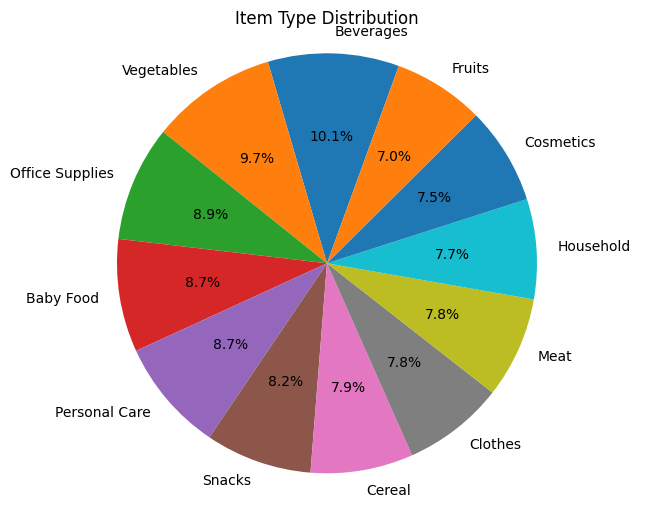

In [ ]:
item_type_counts = df['Item Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', startangle=70)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Item Type Distribution')
plt.show()

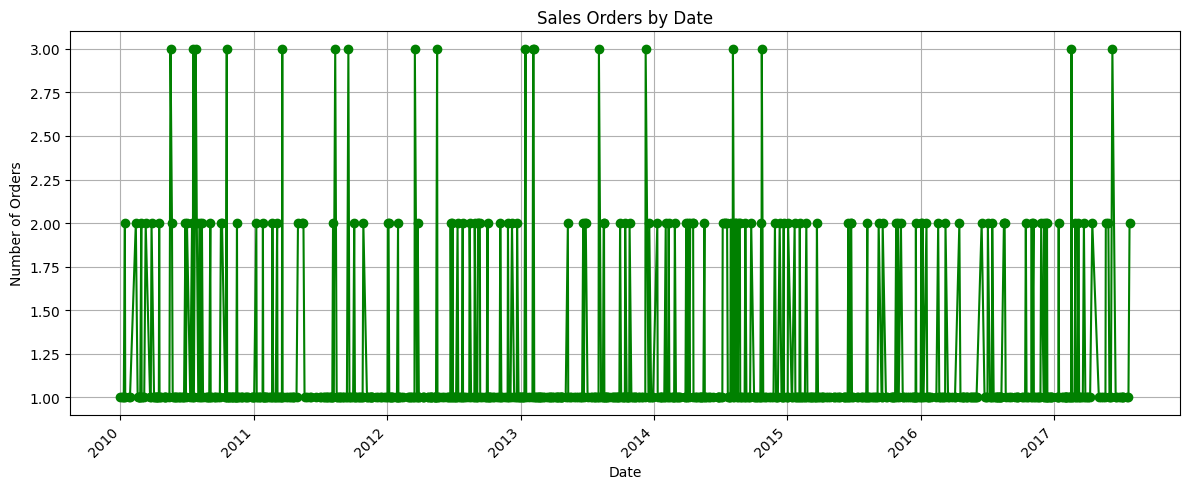

Order Date
2010-01-01    1
2010-01-06    1
2010-01-07    1
2010-01-10    1
2010-01-13    2
dtype: int64


In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by 'Order Date' and count the number of orders
daily_counts = df.groupby('Order Date').size()

plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Sales Orders by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(daily_counts.head())

**CLUSTERING**

In [ ]:
# Select relevant features for clustering
features = df[['Total Revenue', 'Total Profit']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['Cluster'] = kmeans.labels_
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin,Order_Ship_Days,Cluster
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,2014,10,fri,173.87,13 days,1
1,North America,Canada,Vegetables,Online,M,2011-11-07,185941302,2011-12-08,3018,154.06,90.93,464953.08,274426.74,190526.34,2011,11,sun,63.13,31 days,3
2,Middle East and North Africa,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62,2016,10,sun,95.86,39 days,3
3,Asia,Japan,Cereal,Offline,C,2010-04-10,161442649,2010-05-12,3322,205.70,117.11,683335.40,389039.42,294295.98,2010,4,fri,88.59,32 days,0
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,2011-08-16,645713555,2011-08-31,9845,9.33,6.92,91853.85,68127.40,23726.45,2011,8,mon,2.41,15 days,3


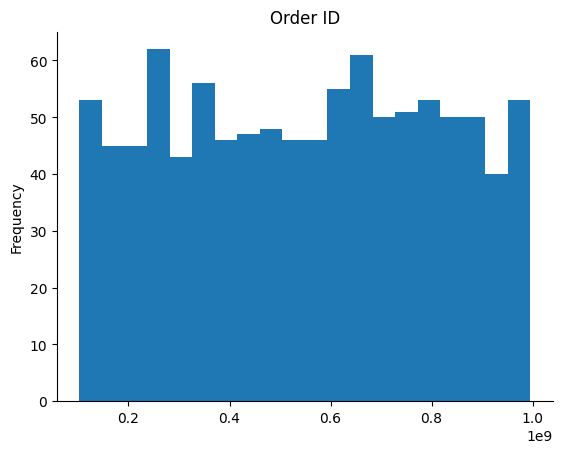

In [ ]:
# @title Order ID

from matplotlib import pyplot as plt
df['Order ID'].plot(kind='hist', bins=20, title='Order ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

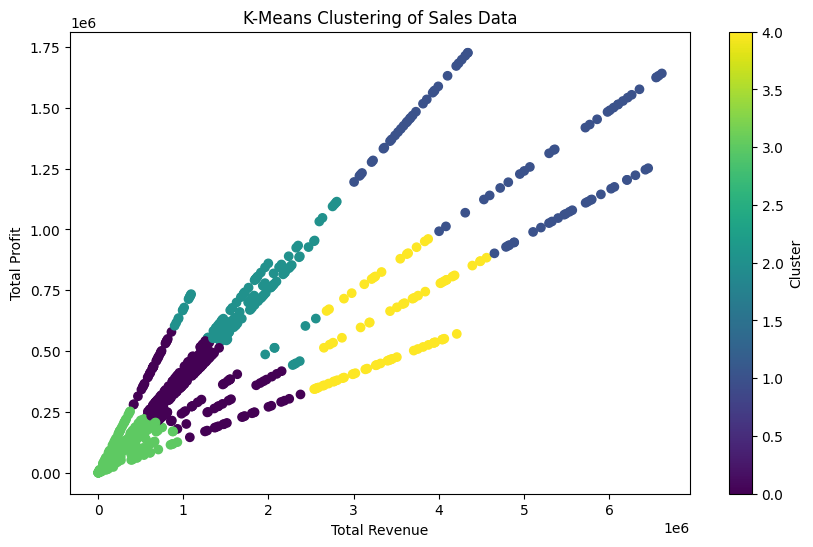

   Total Revenue  Total Profit  Cluster
0     3692591.20    1468506.02        1
1      464953.08     190526.34        3
2      387259.76     145419.62        3
3      683335.40     294295.98        0
4       91853.85      23726.45        3
5     1959909.60     844085.52        2
6      585010.80     251949.96        0
7      797634.72     536038.56        0
8      374057.68     153279.64        3
9      739488.00     303024.00        0


In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Revenue'], df['Total Profit'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.title('K-Means Clustering of Sales Data')
plt.colorbar(label='Cluster')
plt.show()

print(df[['Total Revenue', 'Total Profit', 'Cluster']].head(10))

**AGGLOMERATIVE HIERARCHIAL CLUSTERING**

In [ ]:
# Extract relevant features for clustering
features = df[['Units Sold', 'Total Profit']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Perform Agglomerative Hierarchical clustering
agglo_clustering = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo_clustering.fit_predict(scaled_features)

In [ ]:
# Display the first few rows of the dataset with Agglomerative cluster labels
print(df[['Units Sold', 'Total Profit', 'Agglo_Cluster']].head())

   Units Sold  Total Profit  Agglo_Cluster
0        8446    1468506.02              2
1        3018     190526.34              0
2        1517     145419.62              0
3        3322     294295.98              0
4        9845      23726.45              3


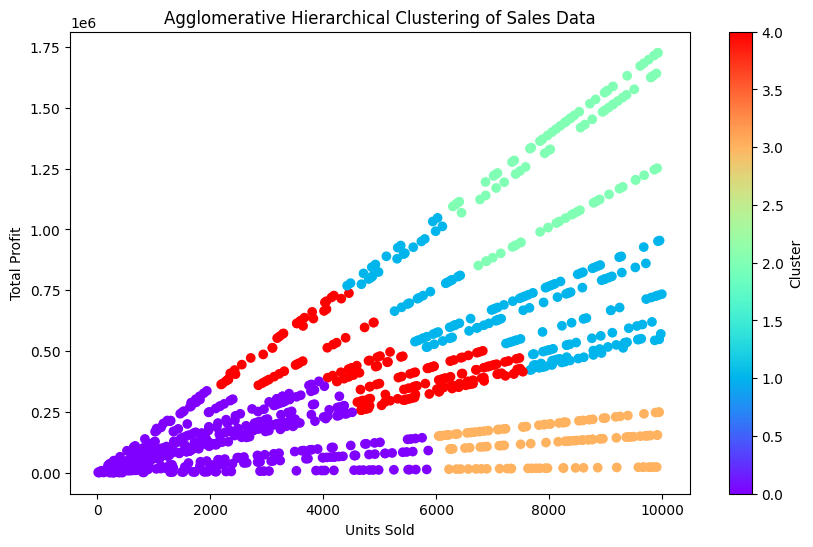

In [ ]:
# Visualize the clusters for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Units Sold'], df['Total Profit'], c=df['Agglo_Cluster'], cmap='rainbow')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.title('Agglomerative Hierarchical Clustering of Sales Data')
plt.colorbar(label='Cluster')
plt.show()